### Importing libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts

### Importing data and preprocessing

In [2]:
#reading in the data and performing basic preprocessing
data = pd.read_csv('Index2018.csv')
df = data.copy #copying the dataframe
df.date = pd.to_datetime(df.date, dayfirst = True) #parsing dates
df.set_index('date', inplace = True) #setting date column as index
df.asfreq('b') #setting a constant frequency as business days
df.fillna('ffill') #filling missing or nan values

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [3]:
# keeping only ftse column and removing rest 
df['market_value'] = df.ftse
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

#splitting the data into training and testing data
size = int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [4]:
def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, DF).round(3)
    return p

### Calculating returns

In [5]:
df_train['returns'] = (df_train.market_value.pct_change(1)*100)
df_train = df_train[1:]

<ipython-input-5-410673ca1c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = (df_train.market_value.pct_change(1)*100)


### plotting returns

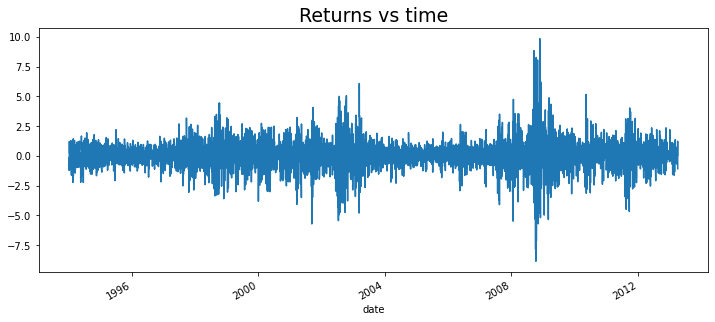

In [7]:
plt.rcParams['figure.figsize'] = (12,5)
df_train.returns.plot()
plt.title('Returns vs time', size = 19)
plt.show()

### ACF for returns

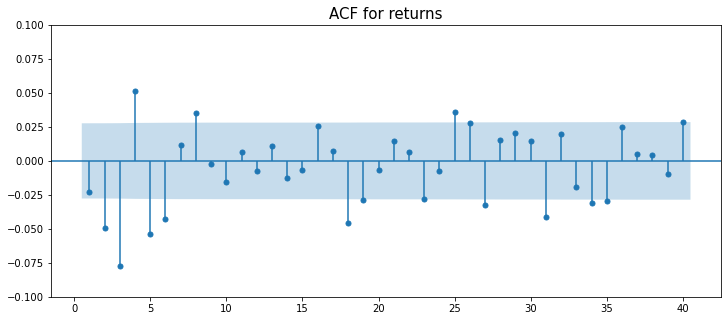

In [8]:
plt.rcParams['figure.figsize'] = (12,5)
sgt.plot_acf(df_train.returns, lags = 40, zero = False)
plt.title('ACF for returns', size = 15)
plt.ylim(-.1,.1)
plt.show()

### MA(1) model

In [9]:
model_ma_1 = ARIMA(df_train.returns, order = (0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7921.751
Date:                Thu, 26 Jan 2023   AIC                          15849.503
Time:                        23:21:53   BIC                          15869.063
Sample:                             0   HQIC                         15856.357
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.016      1.179      0.238      -0.013       0.051
ma.L1         -0.0259      0.009     -3.032      0.002      -0.043      -0.009
sigma2         1.3798      0.014     99.926      0.000       1.353       1.407
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7838.65
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### higher lag models

In [10]:
model_ma_2 = ARIMA(df_train.returns, order = (0,0,2))
results_ma_2 = model_ma_2.fit()
print(results_ma_2.summary())
LLR_test(model_ma_1,model_ma_2)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7915.037
Date:                Thu, 26 Jan 2023   AIC                          15838.073
Time:                        23:31:32   BIC                          15864.153
Sample:                             0   HQIC                         15847.212
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.016      1.237      0.216      -0.011       0.050
ma.L1         -0.0327      0.009     -3.758      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.414      0.0

0.0

In [11]:
model_ma_3 = ARIMA(df_train.returns, order = (0,0,3))
results_ma_3 = model_ma_3.fit()
print(results_ma_3.summary())
LLR_test(model_ma_2,model_ma_3)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7896.969
Date:                Thu, 26 Jan 2023   AIC                          15803.937
Time:                        23:32:07   BIC                          15836.537
Sample:                             0   HQIC                         15815.361
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.015      1.325      0.185      -0.009       0.048
ma.L1         -0.0206      0.009     -2.370      0.018      -0.038      -0.004
ma.L2         -0.0556      0.008     -7.029      0.0

0.0

In [12]:
model_ma_4 = ARIMA(df_train.returns, order = (0,0,4))
results_ma_4 = model_ma_4.fit()
print(results_ma_4.summary())
LLR_test(model_ma_3,model_ma_4)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7891.673
Date:                Thu, 26 Jan 2023   AIC                          15795.345
Time:                        23:32:41   BIC                          15834.465
Sample:                             0   HQIC                         15809.054
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.266      0.206      -0.011       0.049
ma.L1         -0.0205      0.009     -2.261      0.024      -0.038      -0.003
ma.L2         -0.0550      0.008     -6.825      0.0

0.001

In [13]:
model_ma_5 = ARIMA(df_train.returns, order = (0,0,5))
results_ma_5 = model_ma_5.fit()
print(results_ma_5.summary())
LLR_test(model_ma_4,model_ma_5)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7885.545
Date:                Thu, 26 Jan 2023   AIC                          15785.089
Time:                        23:33:04   BIC                          15830.729
Sample:                             0   HQIC                         15801.083
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.313      0.189      -0.010       0.048
ma.L1         -0.0266      0.009     -2.875      0.004      -0.045      -0.008
ma.L2         -0.0495      0.008     -6.121      0.0

0.0

In [14]:
model_ma_6 = ARIMA(df_train.returns, order = (0,0,6))
results_ma_6 = model_ma_6.fit()
print(results_ma_6.summary())
LLR_test(model_ma_5,model_ma_6)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7881.754
Date:                Thu, 26 Jan 2023   AIC                          15779.507
Time:                        23:33:27   BIC                          15831.667
Sample:                             0   HQIC                         15797.786
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.014      1.349      0.177      -0.009       0.047
ma.L1         -0.0239      0.009     -2.578      0.010      -0.042      -0.006
ma.L2         -0.0484      0.008     -5.959      0.0

0.006

In [15]:
model_ma_7 = ARIMA(df_train.returns, order = (0,0,7))
results_ma_7 = model_ma_7.fit()
print(results_ma_7.summary())
LLR_test(model_ma_6,model_ma_7)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7881.524
Date:                Thu, 26 Jan 2023   AIC                          15781.048
Time:                        23:33:54   BIC                          15839.728
Sample:                             0   HQIC                         15801.611
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.015      1.333      0.183      -0.009       0.048
ma.L1         -0.0249      0.009     -2.673      0.008      -0.043      -0.007
ma.L2         -0.0487      0.008     -5.981      0.0

0.498

In [16]:
model_ma_8 = ARIMA(df_train.returns, order = (0,0,8))
results_ma_8 = model_ma_8.fit()
print(results_ma_8.summary())
LLR_test(model_ma_7,model_ma_8)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7878.270
Date:                Thu, 26 Jan 2023   AIC                          15776.540
Time:                        23:34:22   BIC                          15841.740
Sample:                             0   HQIC                         15799.388
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.015      1.284      0.199      -0.010       0.049
ma.L1         -0.0241      0.009     -2.555      0.011      -0.043      -0.006
ma.L2         -0.0494      0.008     -6.029      0.0

0.011

In [17]:
#checking llr test for MA(8) and MA(6)
LLR_test(model_ma_6,model_ma_8, DF = 2)

0.031

### residuals for returns

In [18]:
df_train['residuals_returns'] = results_ma_8.resid
df_train.head()

,market_value,returns,residuals_returns
date,,,
1994-01-10,3440.58,-0.156704,-0.176063
1994-01-11,3413.77,-0.779229,-0.802587
1994-01-12,3372.02,-1.222988,-1.269984
1994-01-13,3360.01,-0.356166,-0.464956
1994-01-14,3400.56,1.206842,1.062083


In [19]:
#checking summary statistics
df_train.residuals_returns.describe()

count    5014.000000
mean       -0.000052
std         1.164640
min        -8.783969
25%        -0.557011
50%         0.034869
75%         0.601373
max         9.049622
Name: residuals_returns, dtype: float64

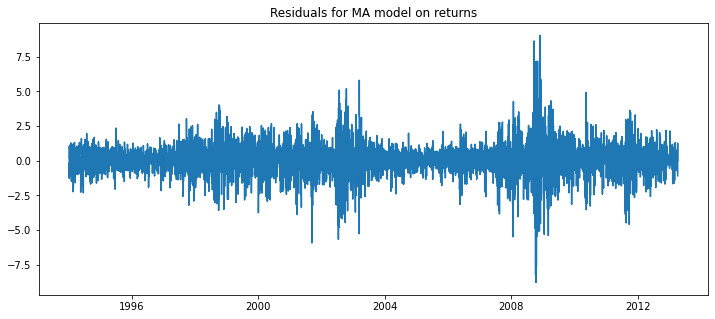

In [20]:
#plotting the residuals
plt.plot(df_train['residuals_returns'])
plt.title('Residuals for MA model on returns',size = 12)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


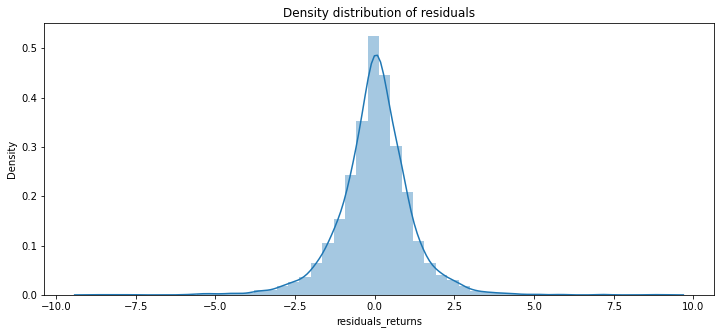

In [23]:
#displot for frequency of residuals
sns.distplot(df_train.residuals_returns)
plt.title('Density distribution of residuals', size = 12)
plt.show()

In [24]:
#checking for stationarity
sts.adfuller(df_train['residuals_returns'])

(-70.80017505049635,
 0.0,
 0,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 15675.197453826331)

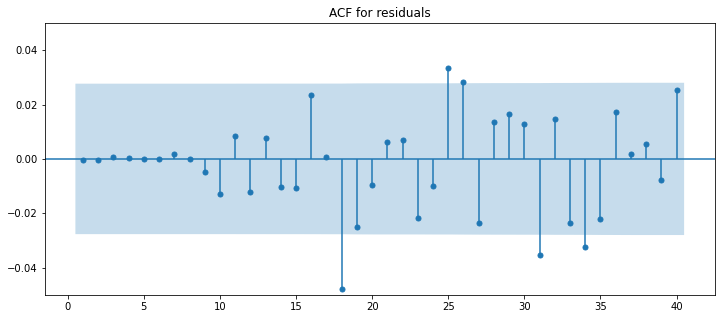

In [28]:
#plotting acf 
sgt.plot_acf(df_train.residuals_returns, lags = 40, zero = False)
plt.title("ACF for residuals", size = 12)
plt.ylim(-.05,.05)
plt.show()

### normalised returns

In [29]:
### normalizing returns and performing dickey fuller test
ret = df_train.returns.iloc[0]
df_train['norm_returns'] = (df_train.returns/ret)*100
df_train.head()

,market_value,returns,residuals_returns,norm_returns
date,,,,
1994-01-10,3440.58,-0.156704,-0.176063,100.000000
1994-01-11,3413.77,-0.779229,-0.802587,497.260711
1994-01-12,3372.02,-1.222988,-1.269984,780.443046
1994-01-13,3360.01,-0.356166,-0.464956,227.285567
1994-01-14,3400.56,1.206842,1.062083,-770.139292


In [30]:
sts.adfuller(df_train.norm_returns)

(-12.78421644953709,
 7.305352237049716e-24,
 32,
 4981,
 {'1%': -3.4316635260404795,
  '5%': -2.8621204359855366,
  '10%': -2.567078966862675},
 80027.44775098964)

In [31]:
#fitting an MA(8) model on normalised returns
model_norm_ma_8 = ARIMA(df_train.norm_returns, order = (0,0,8))
results_norm_ma_8 = model_norm_ma_8.fit()
print(results_norm_ma_8.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -40261.530
Date:                Thu, 26 Jan 2023   AIC                          80543.060
Time:                        23:57:26   BIC                          80608.260
Sample:                             0   HQIC                         80565.908
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276      9.654     -1.277      0.202     -31.249       6.594
ma.L1         -0.0241      0.009     -2.545      0.011      -0.043      -0.006
ma.L2         -0.0494      0.008     -6.006      0.0

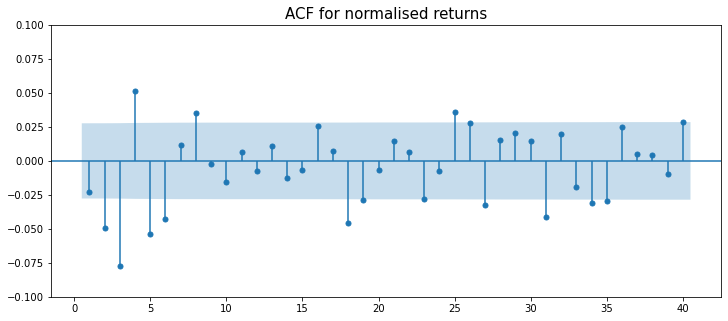

In [32]:
#plotting acf for normalised returns
sgt.plot_acf(df_train.norm_returns, lags = 40, zero = False)
plt.title('ACF for normalised returns', size = 15)
plt.ylim(-.1,.1)
plt.show()

In [36]:
#finding residuals for normalised returns
df_train['norm_return_residuals'] = results_norm_ma_8.resid

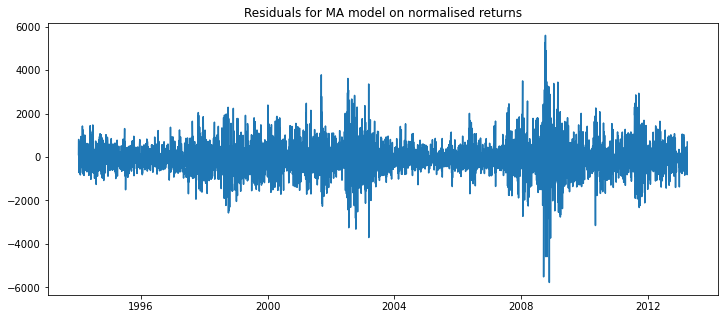

In [37]:
#plotting normalised residuals
plt.plot(df_train['norm_return_residuals'])
plt.title('Residuals for MA model on normalised returns',size = 12)
plt.show()

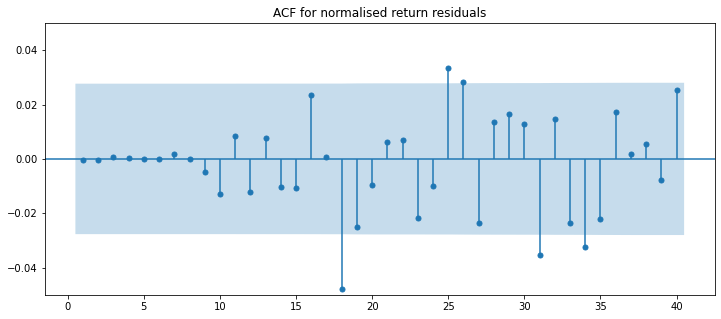

In [39]:
#plotting acf for normalised returns
sgt.plot_acf(df_train.norm_return_residuals, lags = 40, zero = False)
plt.title("ACF for normalised return residuals", size = 12)
plt.ylim(-.05,.05)
plt.show()